In [1]:
from pylab import *
from scipy.stats import expon
from scipy.stats import uniform
%matplotlib inline

In [2]:
def singleMolecule(x0, tf):
    x = array([x0])
    t = zeros(1)
    while t[-1] <= tf:
        if x[-1] == 0:
            tau = expon.rvs(scale = 1. / alpha)
        else:
            tau = expon.rvs(scale = 1. / beta)
        t = append(t, [t[-1]+tau, t[-1]+tau])
        x = append(x, [x[-1], 1-x[-1]])
    return t, x

def histo(t,n):
    intervals = diff(t[0:len(t)+1:2])
    tauOff = intervals[0:len(intervals)+1:2]
    tauOn = intervals[1:len(intervals)+1:2]
    bins = linspace(0, max(max(tauOn),max(tauOff)), n+1)
    histOn, binEdges = histogram(tauOn, bins, density = True)
    histOff, binEdges = histogram(tauOff, bins, density = True)
    binCenters = 0.5*(bins[1:]+bins[:-1])
    return binCenters, histOn, histOff

def multipleMolecules(nOpen0, nTot, tf):
    nOpen = array([nOpen0])
    t = zeros(1)
    while t[-1] <= tf:
        propensities = array([alpha*(nTot-nOpen[-1]), beta*nOpen[-1]])
        tau = expon.rvs(scale = 1. / sum(propensities))
        t = append(t, [t[-1]+tau])
        choice = uniform.rvs()*sum(propensities)
        if choice <= propensities[0]:
            nOpen = append(nOpen, [nOpen[-1]+1])
        else:
            nOpen = append(nOpen, [nOpen[-1]-1])
    return t, nOpen

[0, 50, -0.05, 1.05]

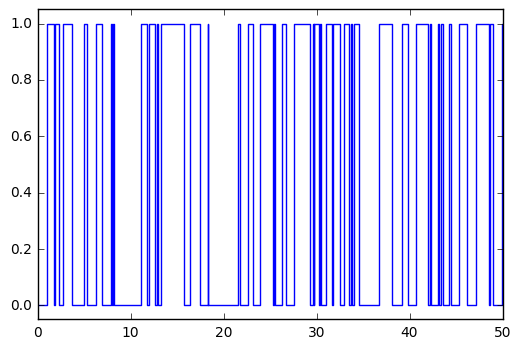

In [6]:
alpha = 1.
beta = 2.
x0 = 0
tf = 50

t, x = singleMolecule(x0, tf)

plot(t, x)
axis([0, tf, -.05, 1.05])

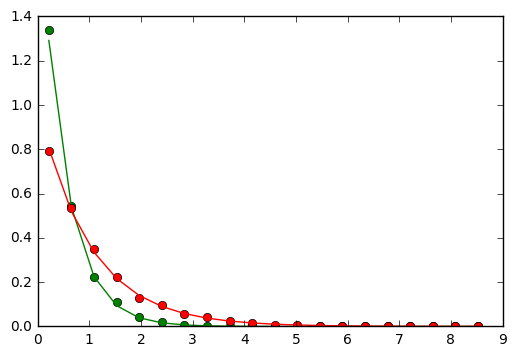

In [9]:
alpha = 1.
beta = 2.
x0 = 0
tf = 10000

t, x = singleMolecule(x0, tf)

binCenters, histOn, histOff = histo(t, 20)

plot(binCenters, histOn, 'o', color = 'green')
plot(binCenters, beta*exp(-beta*binCenters), color = 'green')
plot(binCenters, histOff, 'o', color = 'red')
plot(binCenters, alpha*exp(-alpha*binCenters), color = 'red')

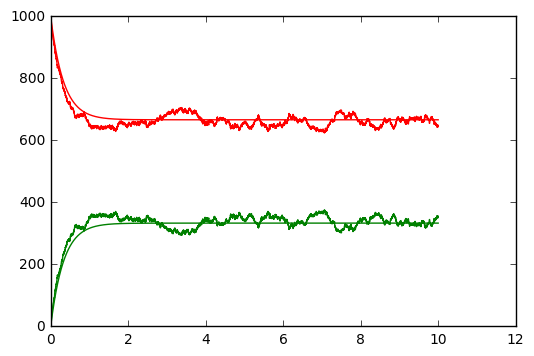

In [20]:
alpha = 1.
beta = 2.
nOpen0 = 0
nTot = 1000
tf = 10

t, nOpen = multipleMolecules(nOpen0, nTot, tf)
plot(t, nOpen, color = 'green')
plot(t, nTot*alpha/(alpha+beta) + (nOpen0 - nTot*alpha/(alpha+beta))*exp(-(alpha+beta)*t), color = 'green')
plot(t, nTot - nOpen, color = 'red')
plot(t, nTot*beta/(alpha+beta) + (nTot - nOpen0 - nTot*beta/(alpha+beta))*exp(-(alpha+beta)*t), color = 'red')

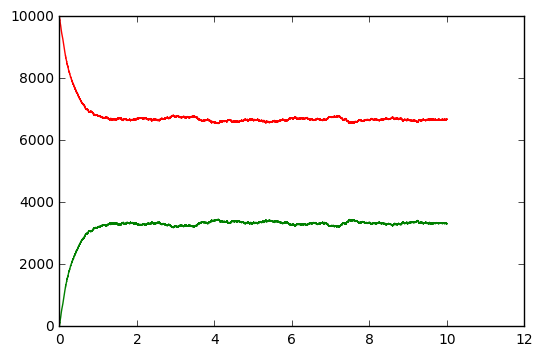